# CTRA Model

Constant turn rate and acceleration model. The states are as follows:

| State Variable | Meaning      |  Frame   |
|----------------|--------------|----------|
|   $x$          | position     | global   |
|   $y$          | position     | global   |
|   $\phi$       | heading      | global   |
|   $\omega$     | yaw rate     | ego      |
|   $v_x$        | velocity     | ego      |
|   $a_x$        | acceleration | ego      |
|   $v_y$        | velocity     | ego      |
|   $a_y$        | acceleration | ego      |

Differential equations that relate change in state to state variables:

$$
\begin{equation}
\begin{aligned}
\dot{x} & = v_x \cos(\phi) - v_y \sin(\phi) \\
\dot{y} & = v_x \sin(\phi) + v_y \cos(\phi)
\end{aligned}
\end{equation}
$$

$$
\dot{v}_x = a_x \\
\dot{v}_y = a_y \\
\dot{\phi} = \omega
$$

Performing Taylor series expansion gives:

$$
\begin{equation}
\begin{split}
\dot{x}(t + \Delta t) & = (v_x(t) + a_x(t) \Delta t + \mathcal{O}(\Delta t^2)) \cos(\phi(t) + \omega(t) \Delta t + \mathcal{O}(\Delta t^2)) \\
        & - (v_y(t) + a_y(t) \Delta t + \mathcal{O}(\Delta t^2)) \sin(\phi(t) + \omega(t) \Delta t + \mathcal{O}(\Delta t^2))
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
\dot{y}(t + \Delta t) & = (v_x(t) + a_x(t) \Delta t + \mathcal{O}(\Delta t^2)) \sin(\phi(t) + \omega(t) \Delta t + \mathcal{O}(\Delta t^2)) \\
        & + (v_y(t) + a_y(t) \Delta t + \mathcal{O}(\Delta t^2)) \cos(\phi(t) + \omega(t) \Delta t + \mathcal{O}(\Delta t^2))
\end{split}
\end{equation}
$$

Neglecting the higher order terms and dropping the $t$ subscript leads to:

$$
\begin{equation}
\begin{split}
\dot{x} & = (v_x + a_x \Delta t) \cos(\phi + \omega \Delta t) \\
        & - (v_y + a_y \Delta t) \sin(\phi + \omega \Delta t)
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
\dot{y} & = (v_x + a_x \Delta t) \sin(\phi + \omega \Delta t) \\
        & + (v_y + a_y \Delta t) \cos(\phi + \omega \Delta t)
\end{split}
\end{equation}
$$

## The CTRA model accurately rotates velocity and accels into global frame

If we try some representative values of $\phi$, we get what we would expect of from $\dot{x}$ and $\dot{y}$

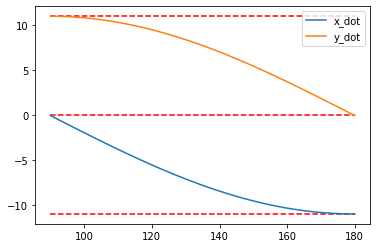

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def next_velocities(phi, omega, vx, ax, vy, ay, dt):
    x_dot = (vx + ax * dt) * np.cos(phi + omega * dt) \
          - (vy + ay * dt) * np.sin(phi + omega * dt)
    y_dot = (vx + ax * dt) * np.sin(phi + omega * dt) \
          + (vy + ay * dt) * np.cos(phi + omega * dt)
    
    return x_dot, y_dot

def output_velocities(phi, omega, vx, ax, vy, ay, dt):
    x_dot, y_dot = next_velocities(phi, omega, vx, ax, vy, ay, dt)
    print('x_dot = ', x_dot)
    print('y_dot = ', y_dot)

vx = 10.
vy = 0.05
ax = 1.
ay = 0.005
phi = np.radians(90)
omega = 0.
dt = 1.

# phi = np.radians(0)
# output_velocities(phi, omega, vx, ax, vy, ay, dt)

x_dots, y_dots = [], []
min_angle, max_angle = 90., 180
omega_angles = np.linspace(min_angle, max_angle, (max_angle - min_angle)+1)
for angle in omega_angles:
    x_dot, y_dot = next_velocities(np.radians(angle), omega, vx, ax, vy, ay, dt)
    x_dots.append(x_dot)
    y_dots.append(y_dot)

plt.figure()
plt.hlines([11., -11., 0.], min_angle, max_angle, linestyle='dashed', color='r')
plt.plot(omega_angles, x_dots, label='x_dot')
plt.plot(omega_angles, y_dots, label='y_dot')
plt.legend()

## Integrate, and discretize to find the state transition function for position

In [1]:
import sympy

